# Import packages, define functions, load, data

In [1]:
from plotnine import *
from mizani.formatters import comma_format
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sorting(df,col,sorter='x'):
    df.sort_values(col, ascending=False, inplace=True)
    df[sorter] = df.reset_index().index + 1

In [12]:
df_wikis = pd.read_csv('raw/Node sizes.csv',index_col=0)
df_wikis

,Language,Language (local),Wiki,Articles,All pages,Edits,Admins,Users,Active users,Files,Depth
0,English,English,en,6671977,58390201,1156307364,898,45730862,117087,905115,1189
1,German,Deutsch,de,2810494,7755162,233223523,180,4172723,17140,127766,93
2,French,français,fr,2530286,12605492,204855286,152,4684236,17667,71219,257
3,Dutch,Nederlands,nl,2124993,4540891,64365222,34,1282663,3859,20,18
4,Russian,русский,ru,1923062,7717296,130862850,72,3406128,10449,243980,153
5,Spanish,español,es,1871425,7932009,151502438,58,6878631,15558,0,200
6,Italian,italiano,it,1815326,7743063,133760845,120,2395488,8088,131030,184
7,Egyptian Arabic,مصرى,arz,1617931,2074722,8157539,7,213007,213,1482,0
8,Polish,polski,pl,1571443,3621384,70481442,100,1244001,4313,260,33
9,Japanese,日本語,ja,1377644,4055412,95485382,41,2083725,14225,4614,88


In [4]:
df_connections = pd.read_csv('raw/Edges.csv',index_col=0)
df_connections

,lang_1,lang_2,weight
0,English,German,3885
1,English,French,4702
2,English,Dutch,2686
3,English,Russian,2050
4,English,Spanish,2866
...,...,...,...
185,Catalan,Indonesian,10
186,Catalan,Korean,7
187,Serbian,Indonesian,4
188,Serbian,Korean,2


# Plot histogram of languages, active users

In [5]:
sorting(df_wikis,'Articles')

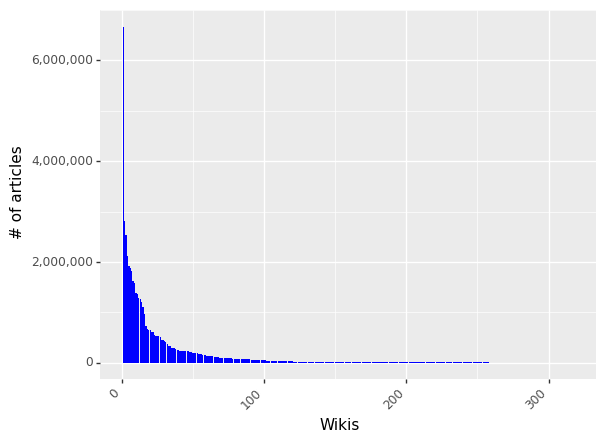

/Users/federico.bindi/anaconda3/envs/baseplus/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/federico.bindi/anaconda3/envs/baseplus/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: out/Distribution of Wikis by nr of articles.png


In [6]:
plot = (
    ggplot(df_wikis, aes(x='x', y='Articles'))
    + geom_col(fill='blue')
    + labs(x='Wikis', y='# of articles')
    + theme(axis_text_x=element_text(rotation=45, hjust=1))
    + scale_y_continuous(labels=comma_format())
)
print(plot)
ggsave(plot, filename='out/Distribution of Wikis by nr of articles.png', dpi=300)

In [7]:
sorting(df_wikis,'Active users')

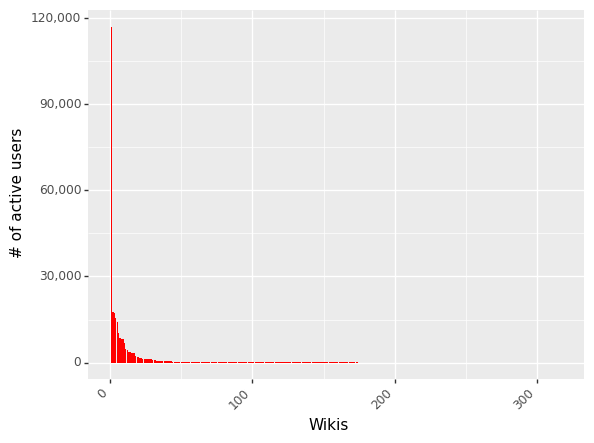

/Users/federico.bindi/anaconda3/envs/baseplus/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/federico.bindi/anaconda3/envs/baseplus/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: out/Distribution of Wikis by active users.png


In [8]:
plot = (
    ggplot(df_wikis, aes(x='x', y='Active users'))
    + geom_col(fill='red')
    + labs(x='Wikis', y='# of active users')
    + theme(axis_text_x=element_text(rotation=45, hjust=1))
    + scale_y_continuous(labels=comma_format())
)
print(plot)
ggsave(plot, filename='out/Distribution of Wikis by active users.png', dpi=300)

# Plot network statistics (couples of languages)

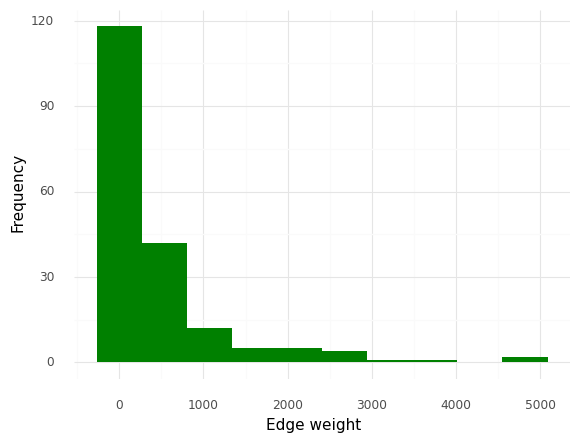

/Users/federico.bindi/anaconda3/envs/baseplus/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/federico.bindi/anaconda3/envs/baseplus/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: out/Histogram of edge weights.png


In [9]:
plot = (
    ggplot(df_connections, aes(x='weight')) +
    geom_histogram(fill='green', bins=10) +
    labs(x='Edge weight', y='Frequency') +
    theme_minimal()
)

# Display the histogram
print(plot)

# Save the histogram as an image
ggsave(plot, "out/Histogram of edge weights.png", dpi=300)

In [10]:
#df_connections_2 = df_connections.rename(columns={'weight':'edge weight'})
df_inverted = df_connections.rename(columns={'lang_1':'lang_2','lang_2':'lang_1'})
df_heatmap = pd.concat([df_connections, df_inverted], axis=0).rename(columns={'weight':'edge weight'})

/Users/federico.bindi/anaconda3/envs/baseplus/lib/python3.10/site-packages/plotnine/guides/guides.py:187: PlotnineWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it


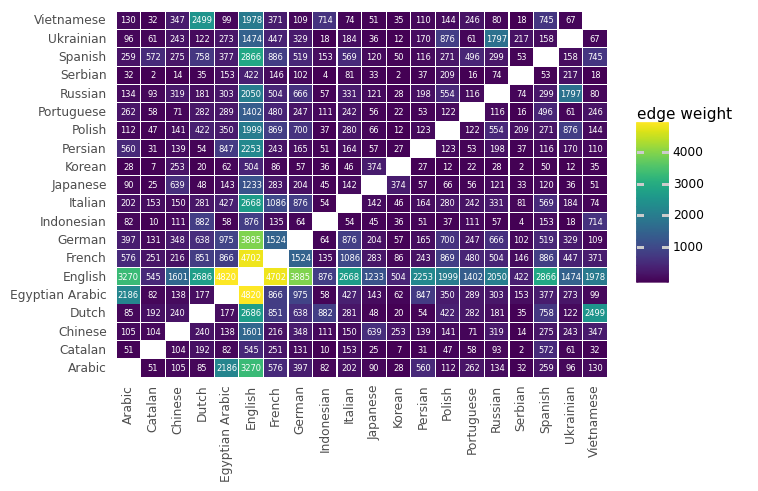

/Users/federico.bindi/anaconda3/envs/baseplus/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/federico.bindi/anaconda3/envs/baseplus/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: out/Heatmap of connections.png


/Users/federico.bindi/anaconda3/envs/baseplus/lib/python3.10/site-packages/plotnine/guides/guides.py:187: PlotnineWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it


In [11]:
plot = (
    ggplot(df_heatmap, aes('lang_1', 'lang_2', fill='edge weight'))
 + geom_tile(aes(width=.95, height=.95))
 + geom_text(aes(label='edge weight'), size=6, color='white', show_legend=False)
 + scale_color_manual(['white', 'black'])
 + theme(                                       
     axis_ticks=element_blank(),
     axis_text_x=element_text(angle=90, hjust=1.5, margin={'t': 1}),
     panel_background=element_rect(fill='white'),
     axis_title=element_blank()
 )
)
print(plot)
ggsave(plot, filename='out/Heatmap of connections.png', dpi=300)